# Santander Kaggle
## Customer Transaction Prediction

<img src="https://i.imgur.com/3jkg3yS.jpg" />

### Neste desafio será necessário prever a variável target do DataSet

Kaggle https://www.kaggle.com/c/santander-customer-transaction-prediction/overview

https://www.kaggle.com/c/santander-customer-transaction-prediction/data

## Santander: Overview da proposta do desafio

No Santander, nossa missão é ajudar pessoas e empresas a prosperar. Estamos sempre procurando maneiras de ajudar nossos clientes a entender sua saúde financeira e identificar quais produtos e serviços podem ajudá-los a atingir suas metas monetárias.

Nossa equipe de ciência de dados está desafiando continuamente nossos algoritmos de aprendizado de máquina, trabalhando com a comunidade global de dados científicos para garantir que possamos identificar com mais precisão novas maneiras de resolver nosso desafio mais comum, problemas de classificação binária como: um cliente está satisfeito? Um cliente comprará este produto? Um cliente pode pagar este empréstimo?

Neste desafio, convidamos a Kagglers a nos ajudar a identificar quais clientes farão uma transação específica no futuro, independentemente do volume de dinheiro transacionado. Os dados fornecidos para esta competição têm a mesma estrutura que os dados reais que temos disponíveis para resolver este problema.

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline



import warnings
warnings.filterwarnings("ignore")

In [2]:
%time train_data = pd.read_csv('C:/Users/skite/OneDrive/Documentos/DataScience_DigitalHouse/Desafio_3/train.csv', sep = ',', encoding  = 'ISO-8859-1')
%time test_data = pd.read_csv('C:/Users/skite/OneDrive/Documentos/DataScience_DigitalHouse/Desafio_3/test.csv', sep = ',', encoding  = 'ISO-8859-1')

Wall time: 7.61 s
Wall time: 8.87 s


In [3]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


# Verificando a variável target:

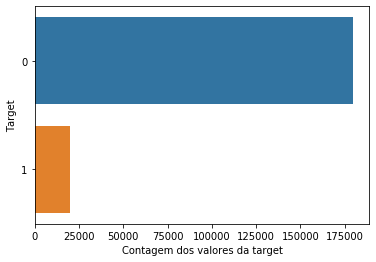

In [6]:
sns.countplot(y=train_data.target ,data=train_data)
plt.xlabel("Contagem dos valores da target")
plt.ylabel("Target")
plt.show()

Note que a um desbalenaceamento da target, mas vamos prosseguir mesmo com esse desbalanecamento.

**Vamos verificar se a desbalanceamento na demais variáveis:**

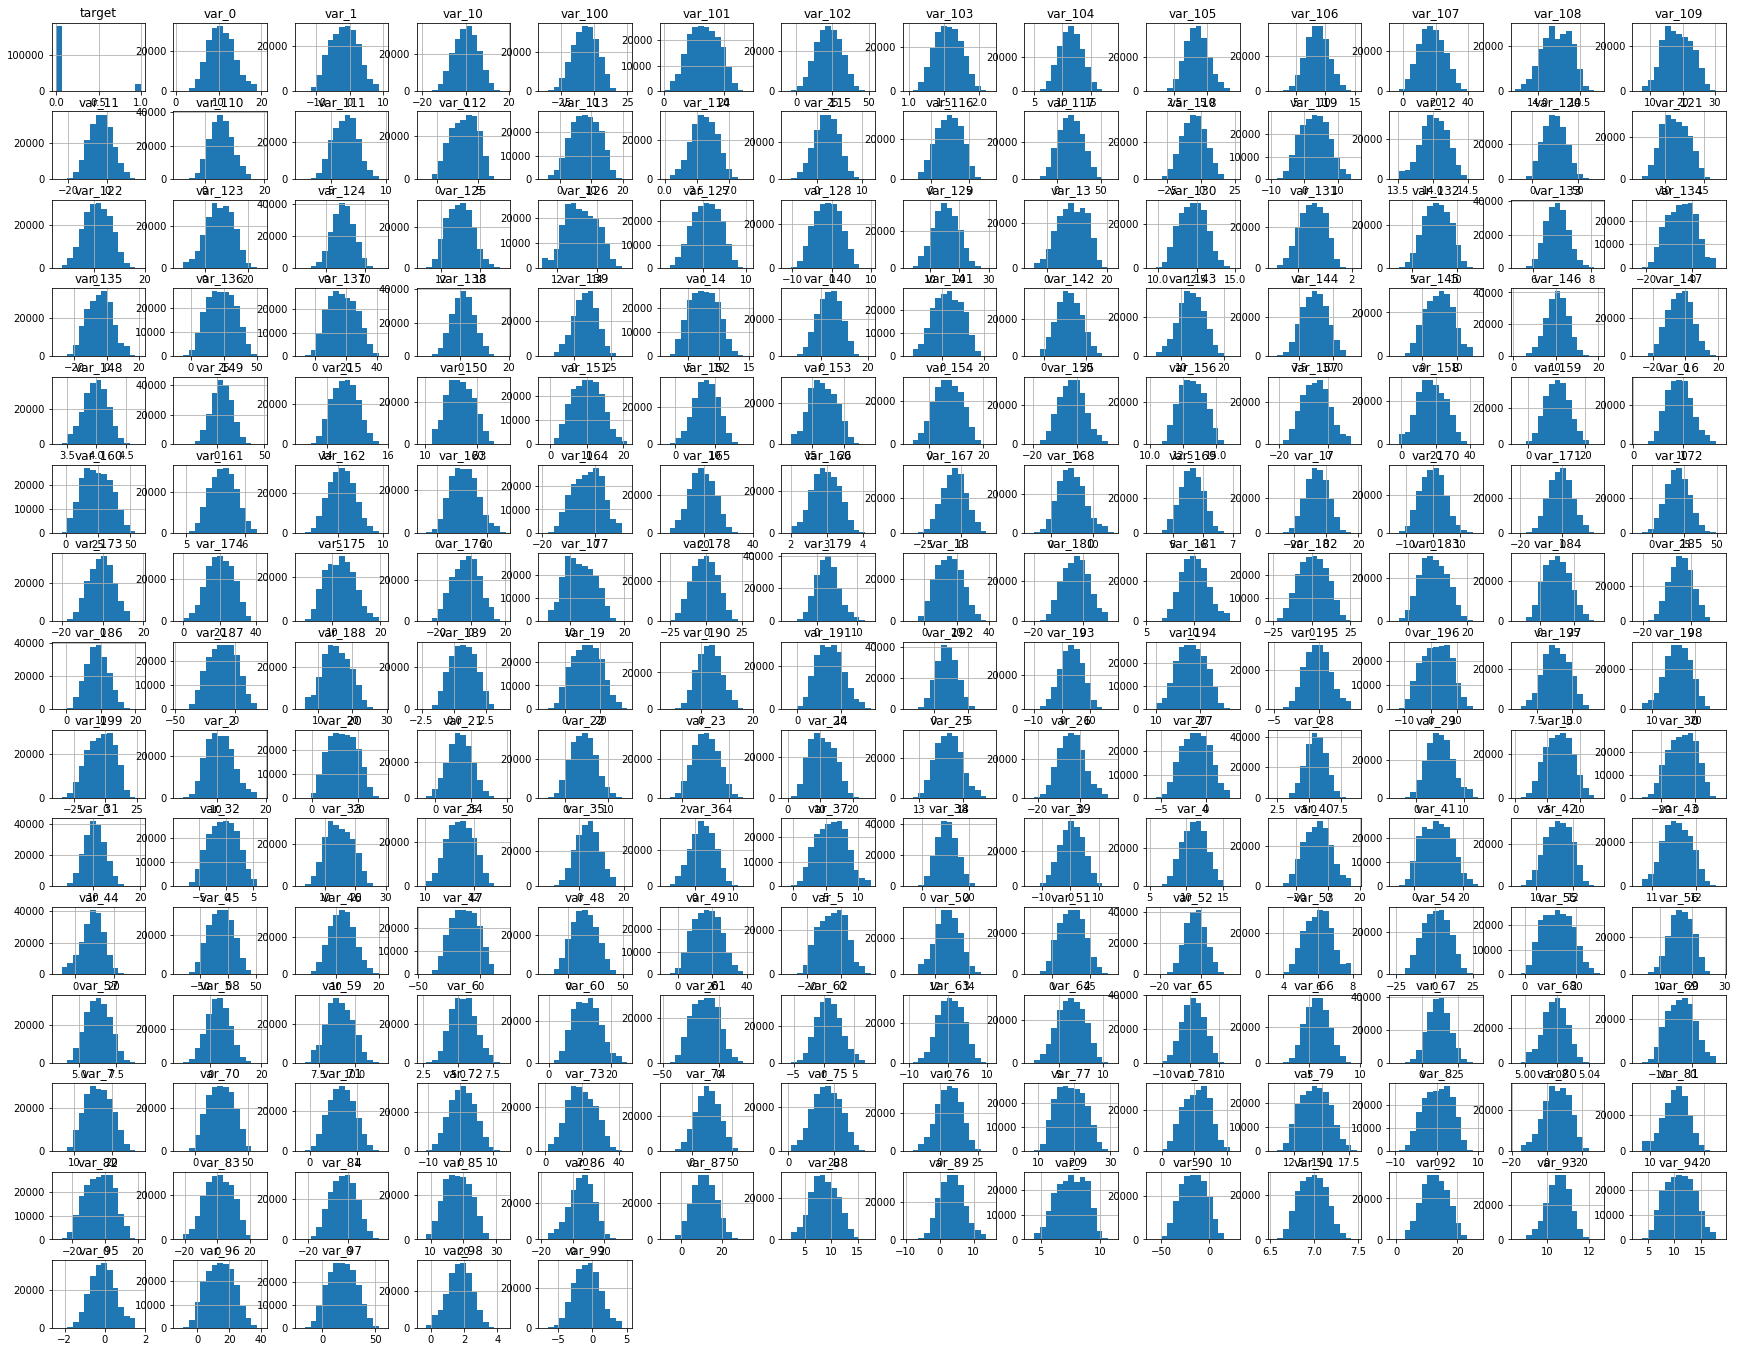

In [7]:
train_data.hist(figsize=(30,24),bins = 15)
plt.title("Distribuição das variáveis")
plt.show()

Note que as variávies então próximas de uma curva normal ou seja não estão muito desbalanceadas, estão muito boas logo seguiremos para os próximos passo. 

# Redução de dimensionalidade 'PCA'

Por que o PCA agora ?

Resposta: O PCA é usado principalmente como uma ferramenta na análise exploratória de dados e na criação de modelos preditivos.

Se tivermos dados de alta dimensão, pode ser difícil plotá-lo de maneira eficaz. Às vezes, a plotagem dos dois primeiros componentes principais pode revelar uma estrutura geométrica interessante nos dados.

E ele encontra atributos / variáveis ​​ essenciais (seleção de recursos em dados de alta dimensão)

In [8]:
from sklearn.preprocessing import MinMaxScaler

mmscale = MinMaxScaler()  
X_train = mmscale.fit_transform(train_data.drop(['ID_code','target'],axis=1))  
X_test = mmscale.transform(test_data.drop(['ID_code'], axis=1))

In [9]:
from sklearn.decomposition import PCA

pca = PCA()  
a = pca.fit_transform(X_train) 
b = pca.transform(X_test)

In [10]:
variancia_pca = pca.explained_variance_ratio_

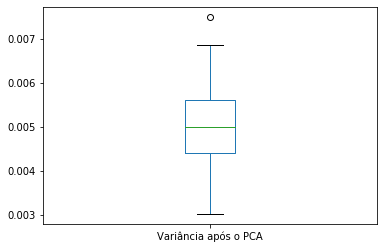

In [11]:
pd.DataFrame(variancia_pca,columns=['Variância após o PCA']).plot(kind='box')

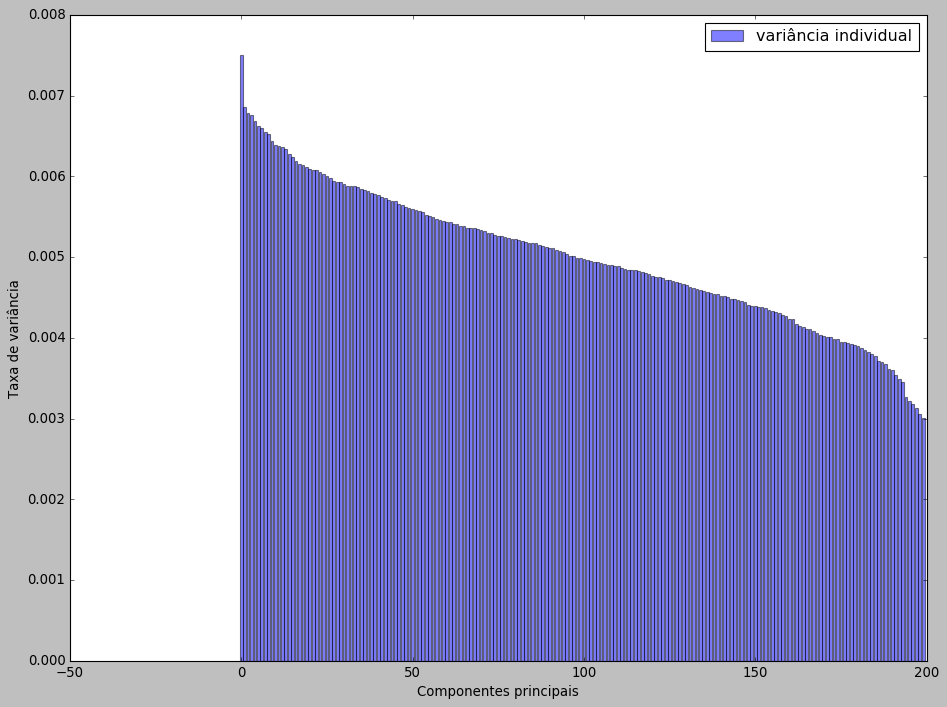

In [12]:
with plt.style.context('classic'):
    plt.figure(figsize=(12, 9))

    plt.bar(range(200), variancia_pca, alpha=0.5, align='center',
            label='variância individual')
    plt.ylabel('Taxa de variância')
    plt.xlabel('Componentes principais')
    plt.legend(loc='best')
    plt.tight_layout()

In [14]:
sum(variancia_pca[:100])

0.5694636501105671

**Conclusão: Não usaremos o PCA, pois encotramos baixa correlação entre as variáveis, portanto o PCA não ficaria eficaz nesse cenário:**

# Vamos criar um Modelo com Gaussian Naive

In [15]:
X_train = train_data.iloc[:, 2:].values.astype('float64')
y_train = train_data['target'].values

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import QuantileTransformer

pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='normal',
                                     random_state=None, subsample=100000)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Após o treinamento do modelo, plotamos a curva ROC nos dados de treinamento e avaliamos o modelo calculando a AUC do treinamento e a AUC para validação.

0.8910920642999894

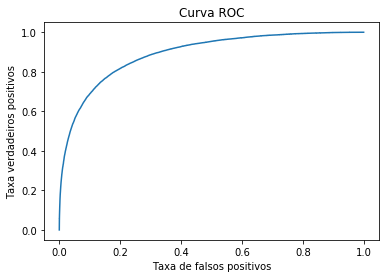

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thr = roc_curve(y_train, pipeline.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa verdadeiros positivos')
plt.title('Curva ROC')
auc(fpr, tpr)

Aplicando o Cross-Validation para obter um score:

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=10).mean()

0.8894189593792333

**Conclução: Alcançamos uma boa AUC em treinamento e uma boa Cross-Validation.** 

# Submetendo os dados para o Kaggle.

In [20]:
test = pd.read_csv('C:/Users/skite/OneDrive/Documentos/DataScience_DigitalHouse/Desafio_3/test.csv', sep = ',', encoding  = 'ISO-8859-1')

In [22]:
X_test = test.iloc[:, 1:].values.astype('float64')
submission = pd.read_csv('C:/Users/skite/OneDrive/Documentos/DataScience_DigitalHouse/Desafio_3/sample_submission.csv')
submission['target'] = pipeline.predict_proba(X_test)[:,1]
submission.to_csv('submission_guassian_naive_bayes_2.csv', index=False)